# SHARP Data Set Data Analysis 

Before start, it is important to know which type of data do we have available. 


The goals of this notebook are the following:
- Perform an EDA of the dataset that was used to generate the training dataset.
- Detect any leaks in the data that could potentially impact the modeling.
- Look for interesting patterns in the dataset that could potentially be useful for the prediction of the solar flares.

## Loading dataset

Due to the size of the dataset (~650 KiB), let's use the `Polars` library.

In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

In [2]:
df = (
    pl.from_pandas(catalog.load("sharp"))
    .sort(pl.col("Timestamp"))
)

[02/08/24 01:51:13] INFO     Loading data from 'sharp' (ParquetDataset)...                      ]8;id=809858;file:///home/rafael/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=590837;file:///home/rafael/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

## EDA

Let's now perform some EDA on this dataset.

First looking at the type of column in this dataset.

In [22]:
df.to_pandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888298 entries, 0 to 2888297
Data columns (total 55 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Timestamp         object 
 1   TOTUSJH           float64
 2   TOTBSQ            float64
 3   TOTPOT            float64
 4   TOTUSJZ           float64
 5   ABSNJZH           float64
 6   SAVNCPP           float64
 7   USFLUX            float64
 8   TOTFZ             float64
 9   MEANPOT           float64
 10  EPSZ              float64
 11  MEANSHR           float64
 12  SHRGT45           float64
 13  MEANGAM           float64
 14  MEANGBT           float64
 15  MEANGBZ           float64
 16  MEANGBH           float64
 17  MEANJZH           float64
 18  TOTFY             float64
 19  MEANJZD           float64
 20  MEANALP           float64
 21  TOTFX             float64
 22  EPSY              float64
 23  EPSX              float64
 24  R_VALUE           float64
 25  CRVAL1            float64
 26  CRLN_OBS      

In this dataset, there is a total of 55 columns. To be more brief lets describe the important columns according to the research paper:

- `TOTUSJH`, total unsigned current helicity ($10^{2} G^{2} / m$).
- `TOTBSQ`, total magnitude of Lorentz force ($10^{10} G^{2}$).
- `TOTPOT`, total photospheric magnetic energy density ($10^{23} ergs / cm^{3}$).
- `TOTUSJZ`, total unsigned vertical current ($10^{12}A$).
- `ABSNJZH`, absolute net current helicity ($10 G^{2} / m$).
- `SAVNCPP`, summed absolute value of net currentper polarity ($10^{12}A$).
- `USFLUX`, total unsigned flux ($10^{21}Mx$).
- `TOTFZ`, sum Z-component of Lorentz force ($-10^{23}dyne$).
- `MEANPOT`, mean photospheric excess magnetic energy density ($10^{3} ergs / cm^{3}$).
- `EPSZ`, sum normalized Lorentz force Z-component ($-10^{-1}$).
- `MEANSHR`, mean shear angle ($°$).
- `SHRGT45`, area with shear angle > 45° ($%$).
- `MEANGAM`, mean inclination angle ($°$).
- `MEANGBT`, mean total field gradient ($G/Mm$).
- `MEANGBZ`, mean vertical field gradient ($G/Mm$).
- `MEANGBH`, mean horizontal field gradient ($G/Mm$).
- `MEANJZH`, mean current helicity ($G^{2} / m$).
- `TOTFY`, sum Y-component of Lorentz force ($-10^{23}dyne$).
- `MEANJZD`, mean vertical current density ($mA/m^{2}$).
- `MEANALP`, mean twist parameter ($1/Mm$).
- `TOTFX`, sum X-component of Lorentz force ($-10^{23}dyne$).
- `EPSY`, sum normalized Lorentz force Y-component ($-10^{-1}$).
- `EPSX`, sum normalized Lorentz force Z-component ($-10^{-1}$).
- `R_VALUE`, total unsigned flux around high gradient polarity inversion lines ($Mx$).
- `BFLARE`, indicates if in the moment of taking the sample there was at least one B flare type.
- `CFLARE`, indicates if in the moment of taking the sample there was at least one C flare type.
- `MFLARE`, indicates if in the moment of taking the sample there was at least one M flare type.
- `XFLARE`, indicates if in the moment of taking the sample there was at least one X flare type.

## Timestamp

It indicates the moment in which the sample was taken, it is relevant as the Sun has ~11 years cycles of activity.

In [21]:
time = df["Timestamp"]

print(f"Earliest date: {min(time)}\nLatest date: {max(time)}")

Earliest date: 2010-05-01 00:00:00
Latest date: 2019-01-07 03:00:00


![Image](https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2022/07/solar_cycle_25_prediction_noaa_july_2022/24369843-1-eng-GB/Solar_cycle_25_prediction_NOAA_July_2022_pillars.png)

As it is seen, the `data` available were gathered in the `solar cycle 24`.

## TOTUSJH

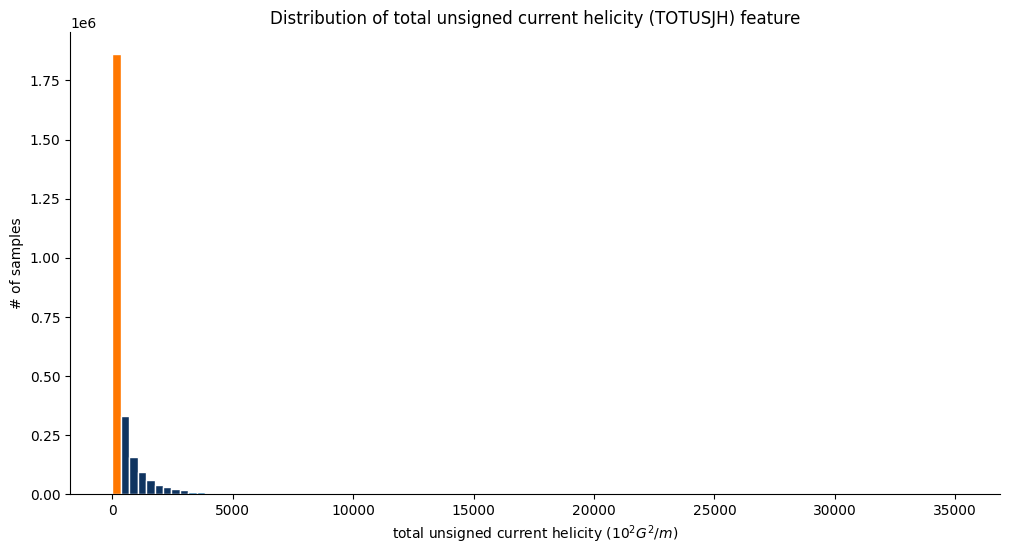

In [128]:
totusjh = df["TOTUSJH"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(totusjh, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of total unsigned current helicity (TOTUSJH) feature",
        ylabel="# of samples",
        xlabel="total unsigned current helicity ($10^{2} G^{2} / m$)"
    )


for i in range(0,1):
    patches[i].set_facecolor("#FF7700")
    
for i in range(1,9):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

As we can observe, the graph is skewed to the right and is not normal distribution. Could be useful to apply log normalization technique.

# TOTBSQ

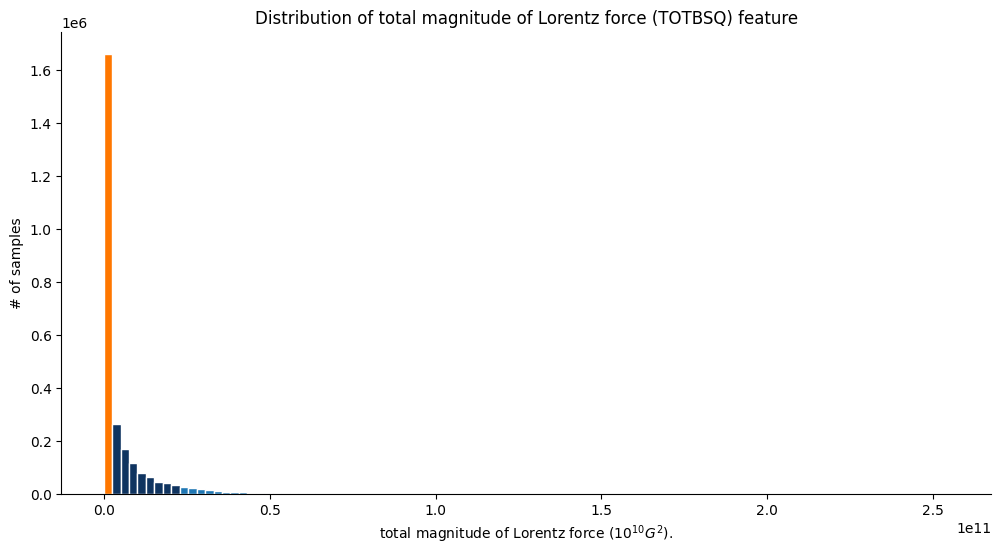

In [129]:
totbsq = df["TOTBSQ"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(totbsq, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of total magnitude of Lorentz force (TOTBSQ) feature",
        ylabel="# of samples",
        xlabel="total magnitude of Lorentz force ($10^{10} G^{2}$)."
    )

for i in range(0,1):
    patches[i].set_facecolor("#FF7700")
    
for i in range(1,9):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

As we can observe again, the graph is skewed to the right and is not normal distribution. Could be useful to apply log normalization technique.

According to the paper this same issue occurs to TOTPOT, TOTUSJZ, ABSNJZH, SAVNCPP, USFLUX, MEANPOT, TOTFZ, TOTFY, TOTFX. To avoid multiple reiterations i will skip the distribution of this features.

## EPSZ 

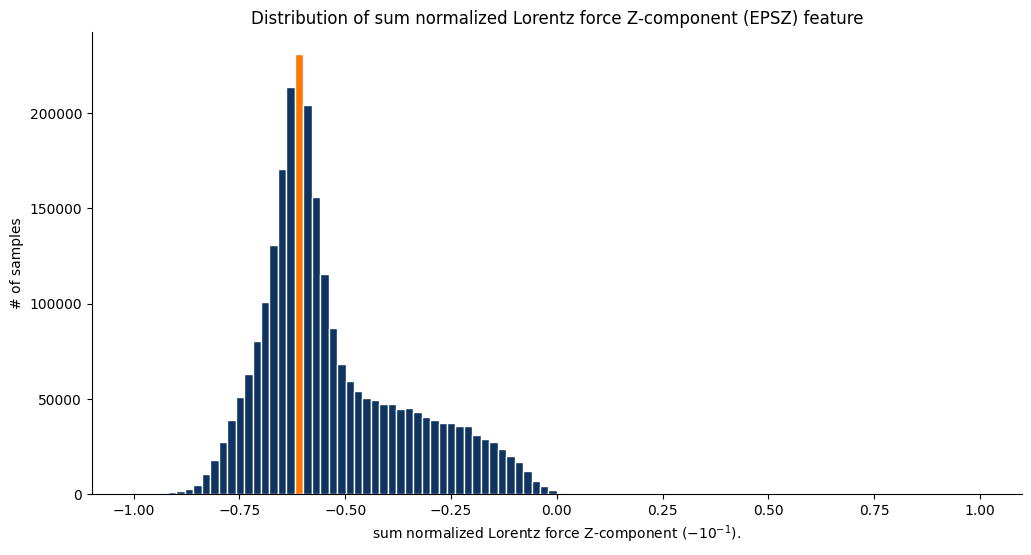

In [131]:
epsz = df["EPSZ"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(epsz, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of sum normalized Lorentz force Z-component (EPSZ) feature",
        ylabel="# of samples",
        xlabel="sum normalized Lorentz force Z-component ($-10^{-1}$)."
    )

for i in range(19,20):
    patches[i].set_facecolor("#FF7700")
    
for i in range(0,19):
    patches[i].set_facecolor("#0F3460")
    
for i in range(20,50):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

As can be observed, the distribution is pseudonormal with median is -0.6.

## MEANSHR

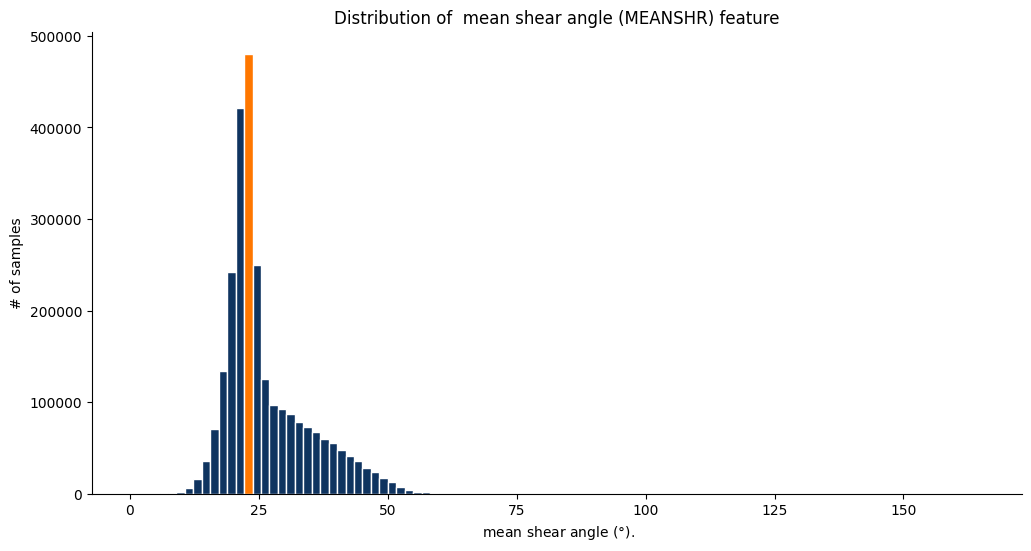

In [133]:
meanshr = df["MEANSHR"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(meanshr, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of  mean shear angle (MEANSHR) feature",
        ylabel="# of samples",
        xlabel=" mean shear angle ($°$)."
    )

for i in range(13,14):
    patches[i].set_facecolor("#FF7700")
    
for i in range(0, 13):
    patches[i].set_facecolor("#0F3460")
    
for i in range(14,50):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## SHRGT45

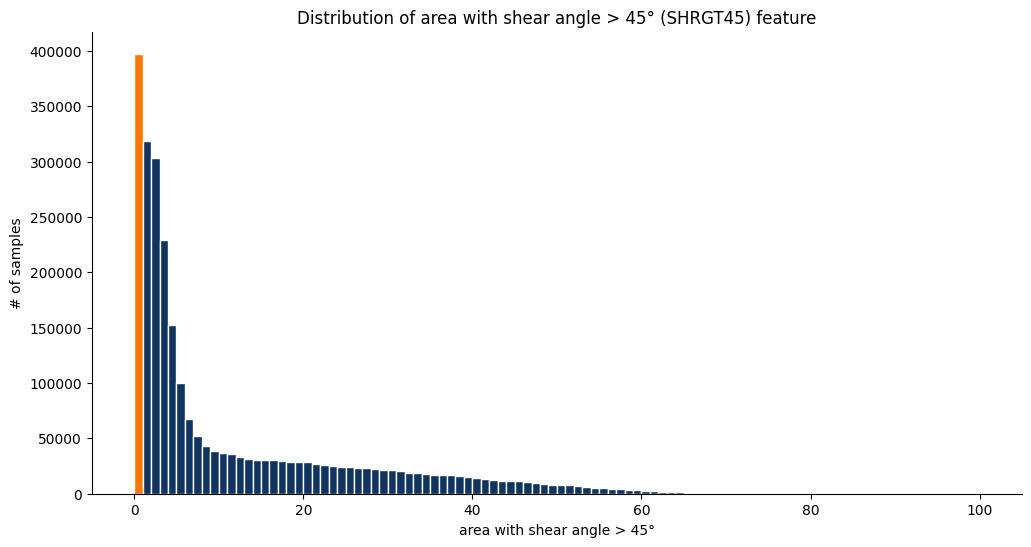

In [136]:
shrgt45 = df["SHRGT45"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(shrgt45, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of area with shear angle > 45° (SHRGT45) feature",
        ylabel="# of samples",
        xlabel="area with shear angle > 45°"
    )

for i in range(0,1):
    patches[i].set_facecolor("#FF7700")
    
for i in range(1,70):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

As we can observe again, the graph is skewed to the right and is not normal distribution. Could be useful to apply log normalization technique.

## MEANGAM

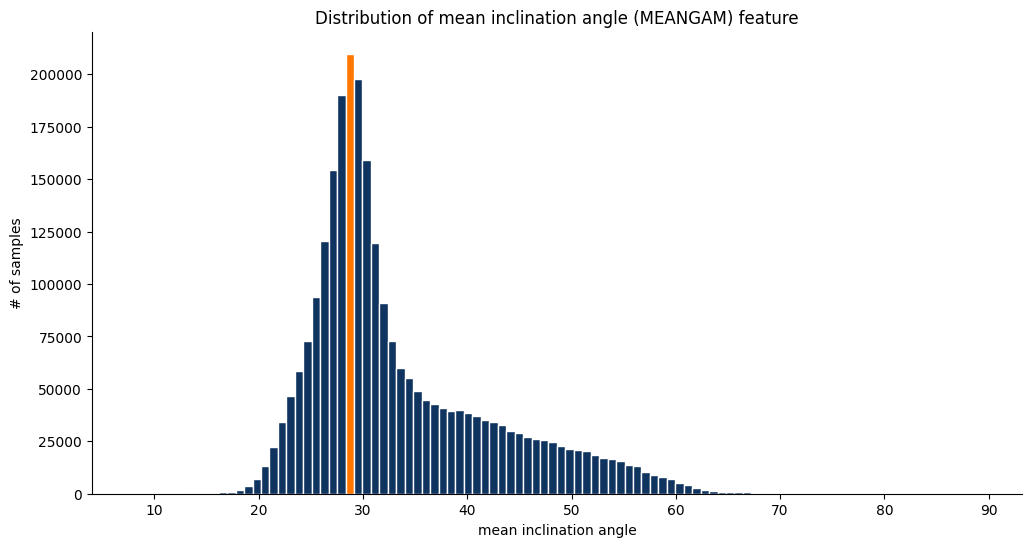

In [140]:
meangam = df["MEANGAM"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(meangam, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of mean inclination angle (MEANGAM) feature",
        ylabel="# of samples",
        xlabel="mean inclination angle"
    )

for i in range(25,26):
    patches[i].set_facecolor("#FF7700")
    
for i in range(0,25):
    patches[i].set_facecolor("#0F3460")
    
for i in range(26,75):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## MEANGBT

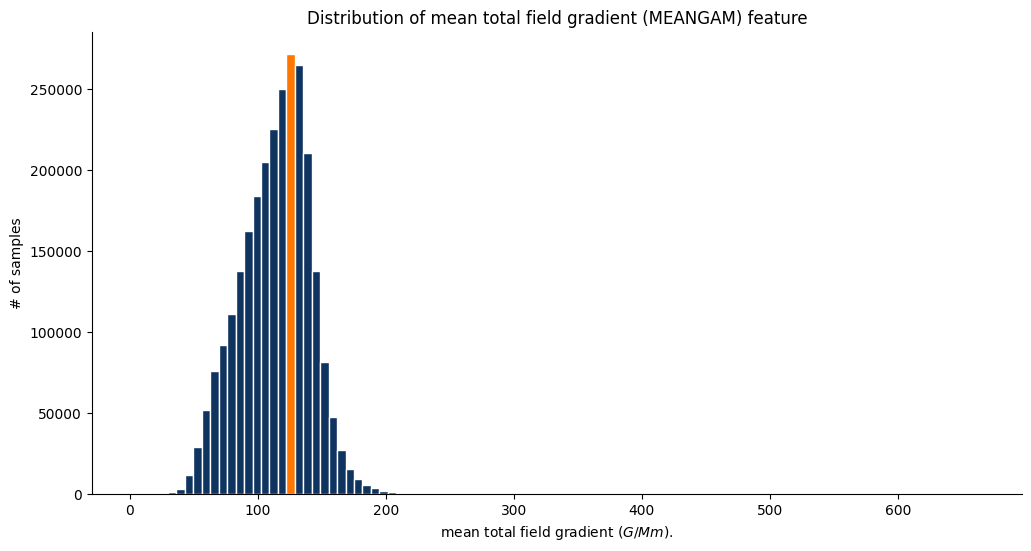

In [143]:
meangbt = df["MEANGBT"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(meangbt, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of mean total field gradient (MEANGAM) feature",
        ylabel="# of samples",
        xlabel="mean total field gradient ($G/Mm$)."
    )

for i in range(18,19):
    patches[i].set_facecolor("#FF7700")
    
for i in range(0,18):
    patches[i].set_facecolor("#0F3460")
    
for i in range(19,50):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## MEANGBZ


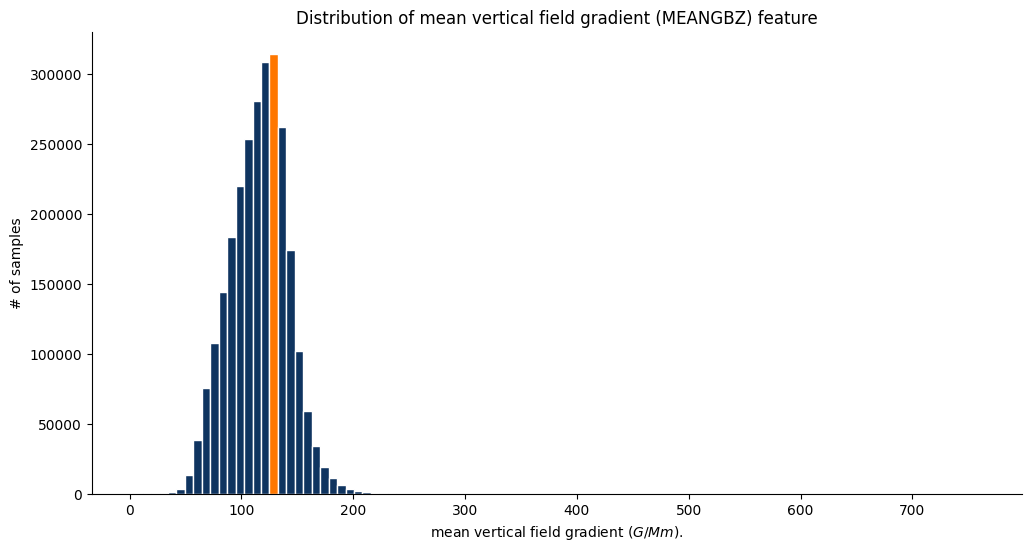

In [144]:
meangbz = df["MEANGBZ"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(meangbz, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of mean vertical field gradient (MEANGBZ) feature",
        ylabel="# of samples",
        xlabel="mean vertical field gradient ($G/Mm$)."
    )

for i in range(16,17):
    patches[i].set_facecolor("#FF7700")
    
for i in range(0,16):
    patches[i].set_facecolor("#0F3460")
    
for i in range(17,50):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## MEANGBH

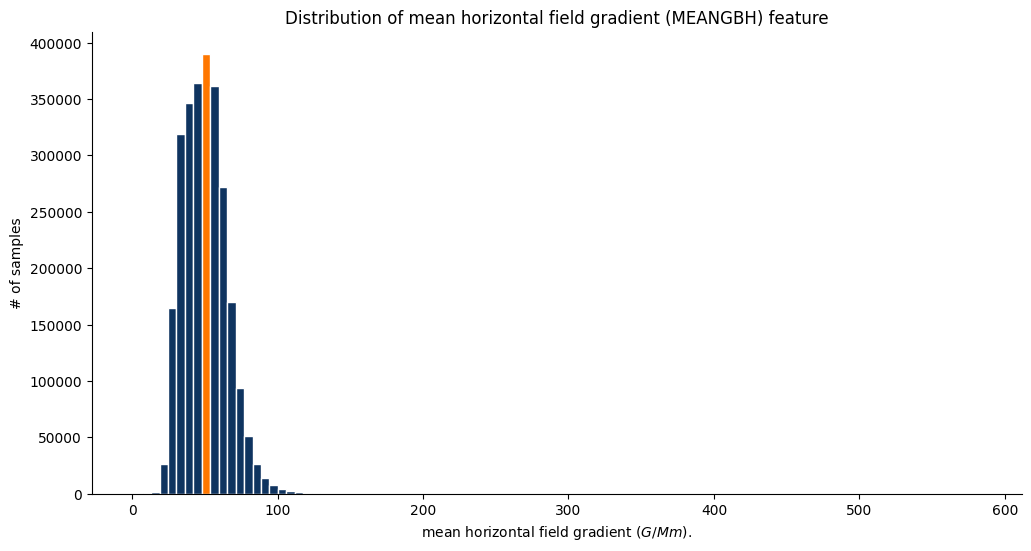

In [146]:
meangbh = df["MEANGBH"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(meangbh, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of mean horizontal field gradient (MEANGBH) feature",
        ylabel="# of samples",
        xlabel="mean horizontal field gradient ($G/Mm$)."
    )

for i in range(8,9):
    patches[i].set_facecolor("#FF7700")
    
for i in range(0,8):
    patches[i].set_facecolor("#0F3460")
    
for i in range(9,20):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## MEANJZH

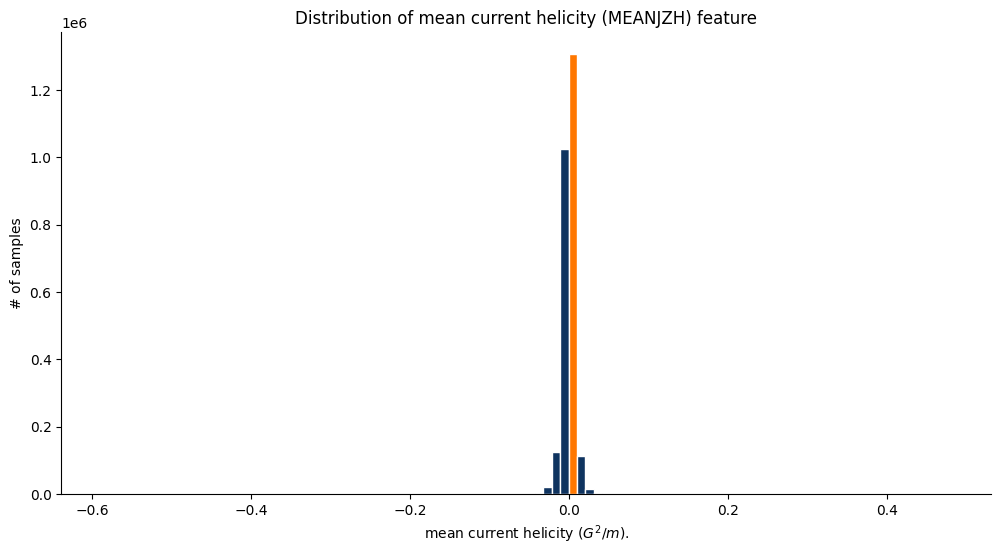

In [149]:
meanjzh = df["MEANJZH"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(meanjzh, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of mean current helicity (MEANJZH) feature",
        ylabel="# of samples",
        xlabel="mean current helicity ($G^{2} / m$)."
    )

for i in range(55,56):
    patches[i].set_facecolor("#FF7700")
    
for i in range(0,55):
    patches[i].set_facecolor("#0F3460")
    
for i in range(56,60):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## MEANJZD

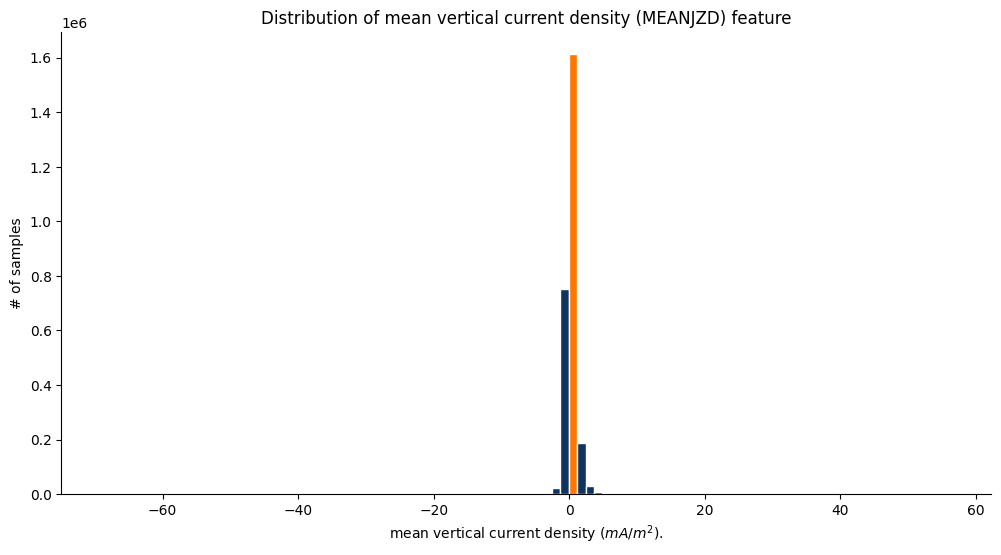

In [153]:
meanjzd = df["MEANJZD"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(meanjzd, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of mean vertical current density (MEANJZD) feature",
        ylabel="# of samples",
        xlabel="mean vertical current density ($mA/m^{2}$)."
    )

for i in range(55,56):
    patches[i].set_facecolor("#FF7700")

for i in range(0,55):
    patches[i].set_facecolor("#0F3460")
    
for i in range(56,60):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## MEANALP

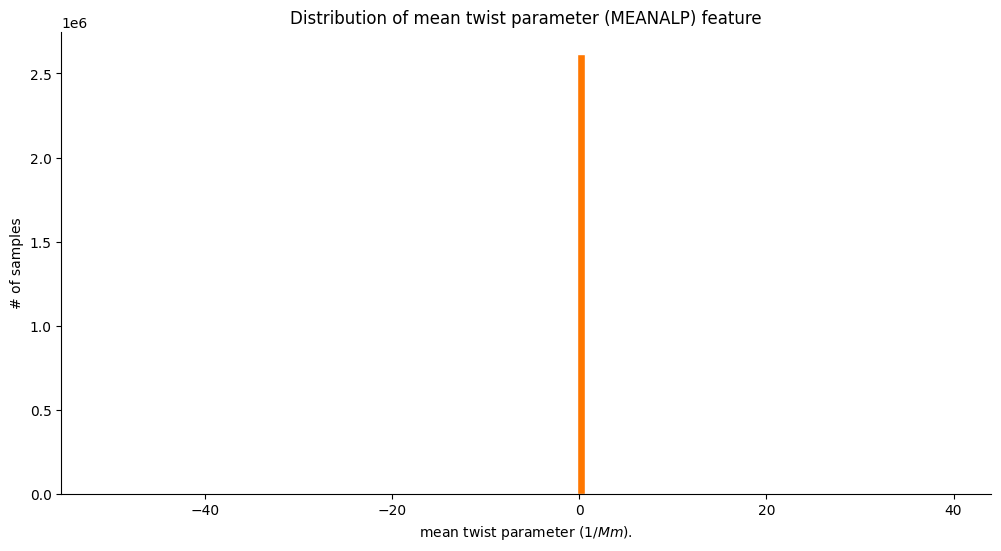

In [156]:
meanalp = df["MEANALP"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(meanalp, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of mean twist parameter (MEANALP) feature",
        ylabel="# of samples",
        xlabel="mean twist parameter ($1/Mm$)."
    )

for i in range(56,57):
    patches[i].set_facecolor("#FF7700")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## EPSY

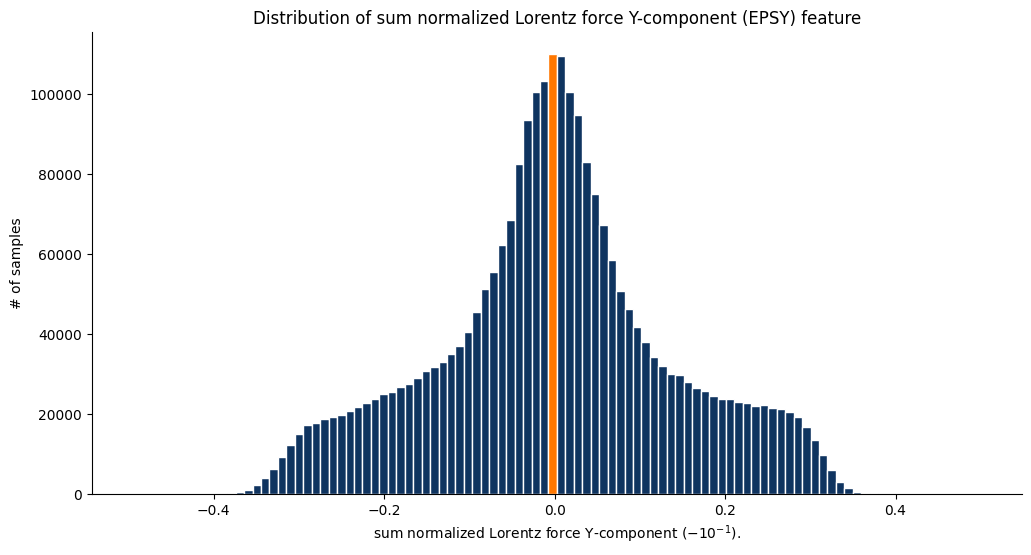

In [159]:
epsy = df["EPSY"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(epsy, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of sum normalized Lorentz force Y-component (EPSY) feature",
        ylabel="# of samples",
        xlabel="sum normalized Lorentz force Y-component ($-10^{-1}$)."
    )

for i in range(49,50):
    patches[i].set_facecolor("#FF7700")
    
for i in range(0,49):
    patches[i].set_facecolor("#0F3460")
    
for i in range(50,90):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## EPSX

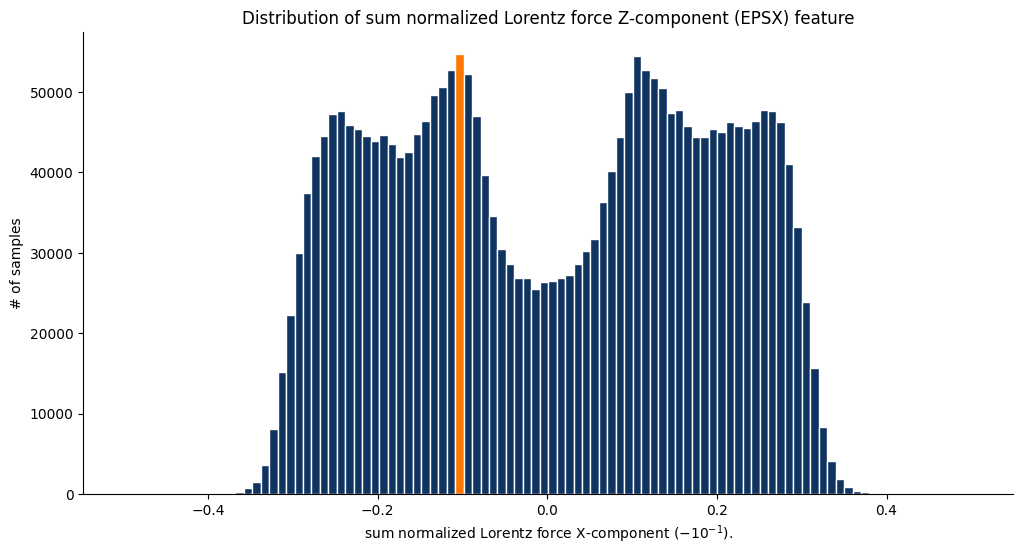

In [162]:
epsx = df["EPSX"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(epsx, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of sum normalized Lorentz force Z-component (EPSX) feature",
        ylabel="# of samples",
        xlabel="sum normalized Lorentz force X-component ($-10^{-1}$)."
    )

for i in range(39,40):
    patches[i].set_facecolor("#FF7700")
    
for i in range(0,39):
    patches[i].set_facecolor("#0F3460")
    
for i in range(40,90):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## EPSZ

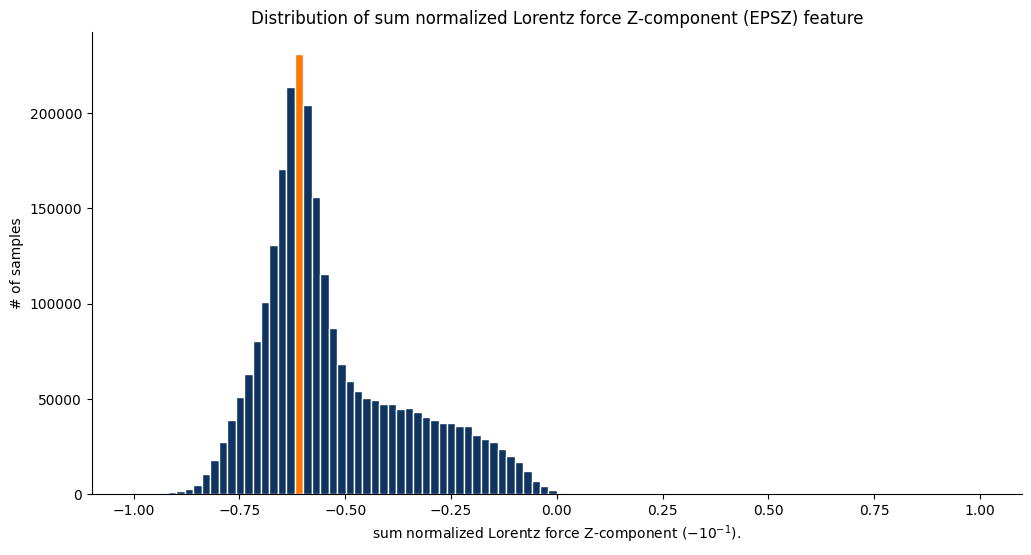

In [165]:
epsz = df["EPSZ"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(epsz, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of sum normalized Lorentz force Z-component (EPSZ) feature",
        ylabel="# of samples",
        xlabel="sum normalized Lorentz force Z-component ($-10^{-1}$)."
    )

for i in range(19,20):
    patches[i].set_facecolor("#FF7700")
    
for i in range(0,19):
    patches[i].set_facecolor("#0F3460")
    
for i in range(20,50):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## R_VALUE

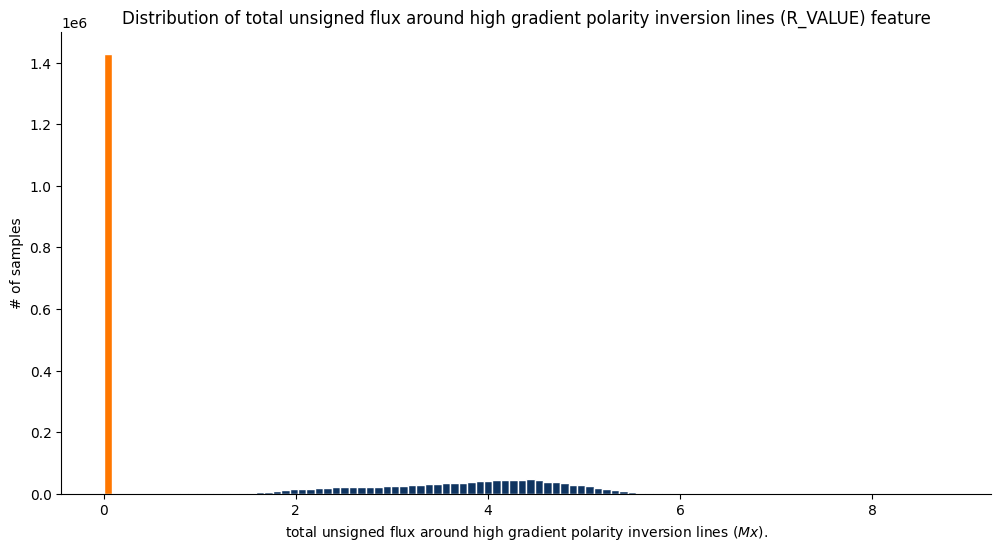

In [167]:
rvalue = df["R_VALUE"].to_pandas()

_, ax = plt.subplots(figsize=(12,6))

_, _, patches = ax.hist(rvalue, bins=100, edgecolor='white', linewidth=1)

ax.set(
        title=f"Distribution of total unsigned flux around high gradient polarity inversion lines (R_VALUE) feature",
        ylabel="# of samples",
        xlabel="total unsigned flux around high gradient polarity inversion lines ($Mx$)."
    )

for i in range(0,1):
    patches[i].set_facecolor("#FF7700")
    
for i in range(1,80):
    patches[i].set_facecolor("#0F3460")
    
for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## BFLARE

In [120]:
(
    df["BFLARE"]
    .to_pandas()
    .value_counts()
)


BFLARE
0.0    2883637
1.0       4550
2.0        111
Name: count, dtype: int64

As it is seen in above table, 4661 B-flare type were produced in the solar cycle 24

## CFLARE

In [121]:
(
    df["CFLARE"]
    .to_pandas()
    .value_counts()
)


CFLARE
0.0    2881235
1.0       7020
2.0         43
Name: count, dtype: int64

As it is seen in above table, 7063 C-flare type were produced in the solar cycle 24

## MFLARE

In [122]:
(
    df["MFLARE"]
    .to_pandas()
    .value_counts()
)


MFLARE
0.0    2887595
1.0        698
2.0          5
Name: count, dtype: int64

As it is seen in above table, 703 M-flare type were produced in the solar cycle 24

## XFLARE

In [125]:
(
    df["XFLARE"]
    .to_pandas()
    .value_counts()
)


XFLARE
0.0    2888251
1.0         46
2.0          1
Name: count, dtype: int64

As it is seen in above table, 47 X-flare type were produced in the solar cycle 24

## CONCLUSION

This EDA has revealed has been really usefull in order to detect the following characteristics in our dataset:

- There is available 2,888,298 data entries.
- The data belongs to solar cycle 24.
- 4661 B-flare, 7063 C-flare, 703 M-flare, 47 X-flare (12474 total flares)
- R_VALUE, MEANALP, SHRGT45, TOTPOT, TOTUSJZ, ABSNJZH, SAVNCPP, USFLUX, MEANPOT, TOTFZ, TOTFY, TOTFX, TOTUSJH, TOTBSQ are potential candidates to suffer log normalization process.